### LinearRegression 原理

> 1.先求出theta

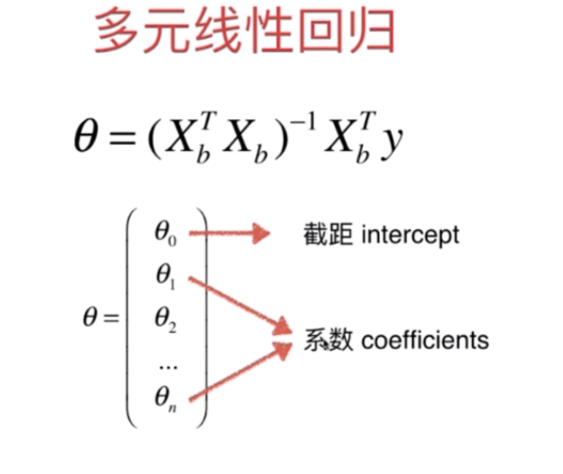
```
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)#
  
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
```      



> 2.预测

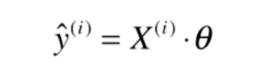

```
   def predict(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self.intercept_ is not None and self.coef_ is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"

        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return X_b.dot(self._theta)

```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]


In [5]:
X.shape

(490, 13)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

%run LinearRegression.py

reg = LinearRegression()
reg.fit_normal(X_train, y_train)

LinearRegression()

In [9]:
reg.coef_

array([-1.14235739e-01,  3.12783163e-02, -4.30926281e-02, -9.16425531e-02,
       -1.09940036e+01,  3.49155727e+00, -1.40778005e-02, -1.06270960e+00,
        2.45307516e-01, -1.23179738e-02, -8.80618320e-01,  8.43243544e-03,
       -3.99667727e-01])

In [11]:
reg.intercept_

32.64566083962019

In [12]:
reg.score(X_test, y_test)

0.800891619951904